In [1]:
import numpy as np
import XNLdyn
import matplotlib.pyplot as plt
import multiprocessing as mp
from multiprocessing import Pool

%matplotlib notebook

In [2]:
import warnings
warnings.filterwarnings('default')

In [3]:

## Set up the problem
PAR = XNLdyn.XNLpars()

PAR.E_j = [850,]

N_local_fluences_to_calculate = 30
N_pulse_energies = 20
Nsteps_r = 100

pulse_energy_J = 1e-15#20 # J

PAR.I0 =  [XNLdyn.photons_per_J(PAR.E_j[0])*pulse_energy_J,]
PAR.I0

[7.342951852306781]

In [4]:
sim = XNLdyn.XNLsim(PAR, DEBUG = True)

sim_options = dict(t_span=[-40, 60],method='RK45', rtol=1e-6, atol=1e-8, plot = True, return_full_solution = True)

incident, transmitted, sol = sim.run(**sim_options)

print('Transmission: ', 100 * transmitted/incident, ' %')


NameError: name 'sim' is not defined

<IPython.core.display.Javascript object>


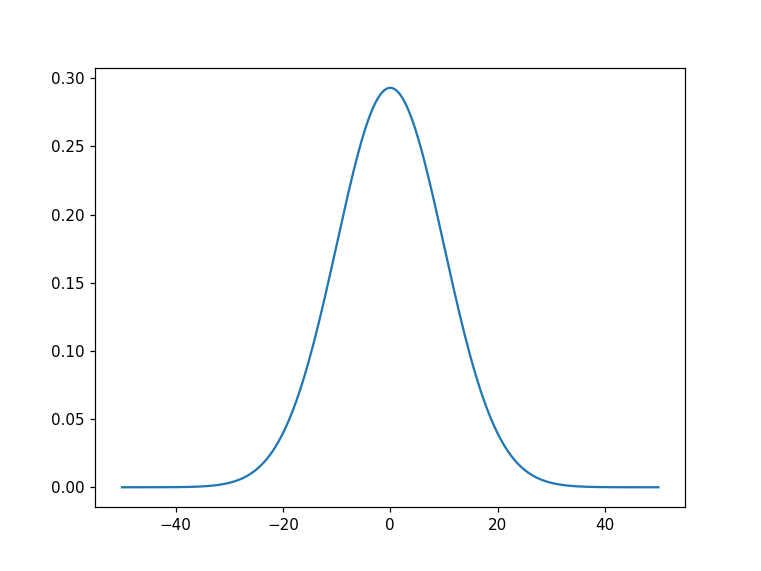

7.342947619617935

In [5]:
t = np.linspace(-50,50,200)
plt.figure()
plt.plot(t,sim.par.pulse_profiles(t))
np.trapz(y= sim.par.pulse_profiles(t),x=t)

In [6]:
a = 1e-8
prec = 1e-8
np.round(a,10)

1e-08

<IPython.core.display.Javascript object>


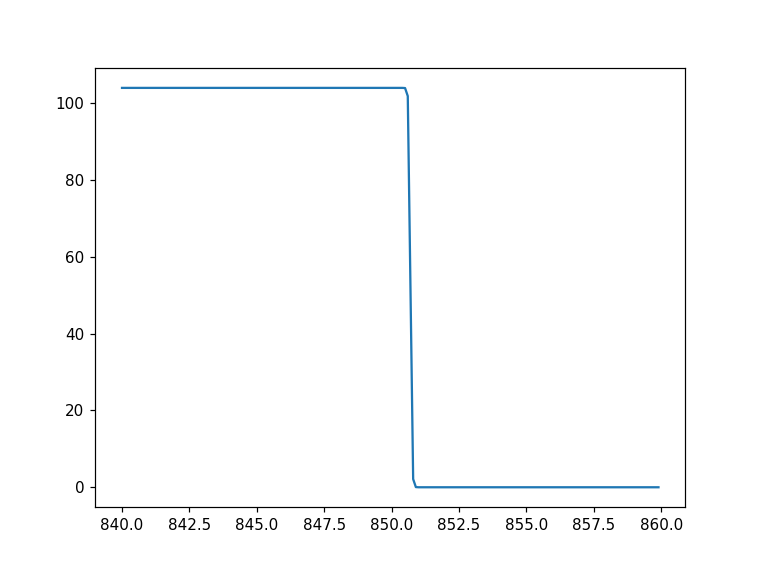

In [9]:
rho_VB  = sim.par.state_vector_0[0, 2]
T       = sim.par.state_vector_0[0, 3] /sim.par.M_VB
enax = np.arange(840, 860, 0.1)
pop =  [sim.fermi(T, rho_VB, E, sim.par.E_f) for E in enax]

plt.figure()
plt.plot(enax, pop)


In [24]:
sim.calc_thermal_occupations(sim.par.state_vector_0)

array([[52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047],
       [52.76330047]])